In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

sns.set_theme()


<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [39]:
def cookPie(df ,column, title="Pie"):
	data = df.groupby(column).size().sort_values(ascending=False)
	plt.figure(figsize=(7,5), dpi=120)
	plt.title(title)

	colors = sns.color_palette('pastel')[0:5]


	pie = plt.pie(data,  autopct='%.0f%%', labels=data.index, colors=colors)

	return pie

In [13]:
streams = pd.read_json("../MyData_streaming_hist/endsong_0.json")

In [15]:
for i in range(1,12):
	streams = pd.concat([streams, pd.read_json(f'../MyData_streaming_hist/endsong_{i}.json')])

In [17]:
streams.to_pickle("../databases/streams.zip")

In [37]:
streams

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2021-03-05T10:28:21Z,11178412941,OS X 10.16.0 [x86 8],32714,NL,92.111.96.178,unknown,Berlin feat. Miss Platnum,Modeselektor,Monkeytown,...,None,None,None,clickrow,endplay,True,NaN,False,1614940065381,False
1,2019-12-09T12:20:30Z,11178412941,OS X 10.15.1 [x86 8],296908,NL,145.109.26.28,unknown,Madera - Rapossa Remix,ANuT,Madera / Emola,...,None,None,None,trackdone,fwdbtn,True,NaN,False,1575892994749,False
2,2017-12-28T12:15:11Z,11178412941,"Android OS 7.0 API 24 (samsung, SM-G930F)",33074,GR,5.144.201.116,unknown,Good Morning,Philip E Morris,"A Beat Collection, Vol. 1",...,None,None,None,fwdbtn,unexpected-exit-while-paused,True,NaN,False,1514458952654,False
3,2017-08-30T13:26:13Z,11178412941,"Android OS 7.0 API 24 (samsung, SM-G930F)",1021,GR,5.144.219.105,unknown,Blockbuster Night Part 1,Run The Jewels,Run the Jewels 2,...,None,None,None,fwdbtn,fwdbtn,False,NaN,False,1504099570534,False
4,2021-07-23T16:42:42Z,11178412941,OS X 11.4.0 [x86 8],348087,GR,87.203.102.5,unknown,Never Give Up - Vril Remix,Mathame,Never Give Up,...,None,None,None,trackdone,trackdone,True,NaN,False,1627058213785,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15341,2018-11-11T17:09:20Z,11178412941,Windows 10 (10.0.17134; x64),4870,GR,193.92.75.22,unknown,Gun Smoke,Senbeï,Army of Me,...,None,None,None,clickrow,endplay,False,NaN,False,1541956147738,False
15342,2018-08-19T14:03:23Z,11178412941,Windows 10 (10.0.17134; x64),278319,GR,94.64.76.88,unknown,Istanbul - Radio Mix,Dj. Volkan Uça,Istanbul,...,None,None,None,trackdone,trackdone,True,NaN,False,1534687123339,False
15343,2020-07-05T21:08:18Z,11178412941,"Android OS 9 API 28 (samsung, SM-A600FN)",860,NL,80.61.160.76,unknown,Vocabularious,Youthstar,Vocabularious,...,None,None,None,fwdbtn,fwdbtn,False,NaN,False,1593983295998,False
15344,2018-12-08T14:55:04Z,11178412941,"Android OS 8.0.0 API 26 (samsung, SM-A600FN)",84455,GR,5.144.193.90,unknown,Lights out (feat. JungFreud),PHFAT,Lights out (feat. JungFreud),...,None,None,None,clickrow,endplay,False,NaN,False,1544280818456,False


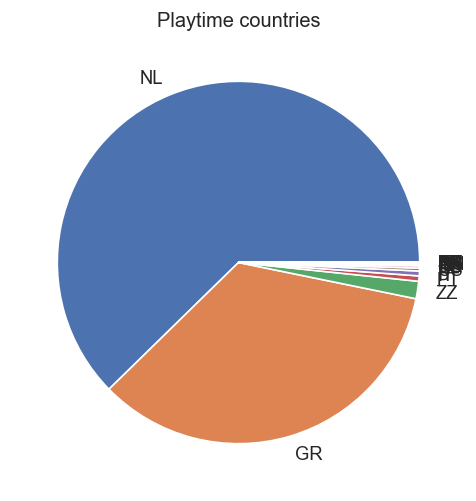

conn_country
NL    121310
GR     67088
ZZ      3018
PT       925
IT       841
US       496
ES       396
DE       164
IE       115
CH        95
FR        72
RS        38
SE        28
BG        23
BR        13
AT        13
JP         3
DK         2
dtype: int64


In [36]:
countries = streams.groupby("conn_country").size().sort_values(ascending=False)
plt.figure(figsize=(5,5), dpi=120)


plt.pie(countries.values, labels=countries.index)
plt.title("Playtime countries")
plt.show()

print(countries)

In [40]:
cookPie(streams,"master_metadata_album_artist_name")

([<matplotlib.patches.Wedge at 0x13bf6dc10>,
  ...],
 [Text(1.0986715759016645, 0.0540441329447814, 'Gramatik'),
  Text(1.0892703762054508, 0.15326463232342966, 'Ours Samplus'),
  Text(1.076931472468373, 0.22409507715945554, 'Pink Floyd'),
  Text(1.065399874278845, 0.27372085760245135, 'Jazz Morning Playlist'),
  Text(1.054690547550143, 0.3124545549490032, 'Parov Stelar'),
  Text(1.0457739036606684, 0.3411113343504245, 'Eminem'),
  Text(1.0365619810470117, 0.3681565692037761, 'Charles Bradley'),
  Text(1.0274089975445948, 0.39297678272947734, 'Philip Glass'),
  Text(1.0185173451565503, 0.4154785404990887, 'TOOL'),
  Text(1.0095007622476582, 0.4369304418570505, 'Guts'),
  Text(1.0001953871195535, 0.4578309596180307, 'Smokey Joe & The Kid'),
  Text(0.9908053620100086, 0.47781244710892157, 'PHFAT'),
  Text(0.9814343469581384, 0.4967762299173066, 'Arctic Monkeys'),
  Text(0.9718254570792377, 0.5153205613719783, 'Red Hot Chili Peppers'),
  Text(0.9619438819986825, 0.5335390968666728, 'Anima

/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: Glyph 9774 (\N{PEACE SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: 
Joey Bada$$
         ^
Expected end of text, found '$'  (at char 9), (line:1, col:10)

<Figure size 840x600 with 1 Axes>